In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
sns.set()
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import f_regression
import scipy.stats as stat
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import display, HTML
from scipy.stats.mstats import winsorize

pd.options.display.float_format = '{:.5f}'.format

# Explore this dataset using what you have learned in data preprocessing and data visualization
## Invalid data
Some columns are containing mostly 0 (75% quantile = 0):

**waterfront,view,yr_renovated**

(50% quantile = 0)

**sqft_basement**
## Zero values removal
From above table we can see that some columns have ouliers (max is very much bigger that 75% percentile and mean)
price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,sqft_above,sqft_basement,sqft_living15	,sqft_lot15

In [2]:
data=pd.read_csv("kc_house_data.csv")
pd.set_option('display.max_columns', 1000)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
data.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,21613,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
unique,nan,372,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,20140623T000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,142,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,4580301520.86499,NaN,540088.14177,3.37084,2.11476,2079.89974,15106.96757,1.49431,0.00754,0.23430,3.40943,7.65687,1788.39069,291.50905,1971.00514,84.40226,98077.93980,47.56005,-122.21390,1986.55249,12768.45565
std,2876565571.31205,NaN,367127.19648,0.93006,0.77016,918.44090,41420.51152,0.53999,0.08652,0.76632,0.65074,1.17546,828.09098,442.57504,29.37341,401.67924,53.50503,0.13856,0.14083,685.39130,27304.17963
min,1000102.00000,NaN,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123049194.00000,NaN,321950.00000,3.00000,1.75000,1427.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.47100,-122.32800,1490.00000,5100.00000
50%,3904930410.00000,NaN,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,0.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23000,1840.00000,7620.00000
75%,7308900445.00000,NaN,645000.00000,4.00000,2.50000,2550.00000,10688.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,560.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000


In [6]:
bad_cols="waterfront,view,yr_renovated,sqft_basement".split(',')
for col in bad_cols:
    nonzero=data[col][data[col]!=0].count()
    alldata=data[col].count()
    print("Column '{}' has only {:.2f}% of data different from zero".format(col,(nonzero/alldata)*100))

Column 'waterfront' has only 0.75% of data different from zero
Column 'view' has only 9.83% of data different from zero
Column 'yr_renovated' has only 4.23% of data different from zero
Column 'sqft_basement' has only 39.27% of data different from zero


In [7]:
data['waterfront'].unique()

array([0, 1])

**waterfront** seems to be categorical feature 

In [8]:
data['view'].unique()

array([0, 3, 4, 2, 1])

**view** seems to be categorical feature 

In [9]:
categorical=["waterfront","view"]

In [10]:
data['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

**yr_renovated** did'nt seems to be categorical feature => column must be removed

In [11]:
data['sqft_basement'].unique()

array([   0,  400,  910, 1530,  730, 1700,  300,  970,  760,  720,  700,
        820,  780,  790,  330, 1620,  360,  588, 1510,  410,  990,  600,
        560,  550, 1000, 1600,  500, 1040,  880, 1010,  240,  265,  290,
        800,  540,  380,  710,  840,  770,  480,  570, 1490,  620, 1250,
       1270,  120,  650,  180, 1130,  450, 1640, 1460, 1020, 1030,  750,
        640, 1070,  490, 1310,  630, 2000,  390,  430,  850,  210, 1430,
       1950,  440,  220, 1160,  860,  580, 2060, 1820, 1180,  200, 1150,
       1200,  680,  530, 1450, 1170, 1080,  960, 1100,  280,  870,  460,
       1400, 1320,  660, 1220,  900,  420, 1580, 1380,  475,  690,  270,
        350,  935, 1370,  980, 1470,  160,  950,   50,  740, 1780, 1900,
        340,  470,  370,  140, 1760,  130,  610,  520,  890, 1110,  150,
       1720,  810,  190, 1290,  670, 1800, 1120, 1810,   60, 1050,  940,
        310,  930, 1390, 1830, 1300,  510, 1330, 1590,  920, 1420, 1240,
       1960, 1560, 2020, 1190, 2110, 1280,  250, 23

For the moment we will remove only **yr_renovated**

In [12]:
data=data.drop('yr_renovated', axis=1)

In [13]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,4580301520.86499,540088.14177,3.37084,2.11476,2079.89974,15106.96757,1.49431,0.00754,0.23430,3.40943,7.65687,1788.39069,291.50905,1971.00514,98077.93980,47.56005,-122.21390,1986.55249,12768.45565
std,2876565571.31205,367127.19648,0.93006,0.77016,918.44090,41420.51152,0.53999,0.08652,0.76632,0.65074,1.17546,828.09098,442.57504,29.37341,53.50503,0.13856,0.14083,685.39130,27304.17963
min,1000102.00000,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123049194.00000,321950.00000,3.00000,1.75000,1427.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,0.00000,1951.00000,98033.00000,47.47100,-122.32800,1490.00000,5100.00000
50%,3904930410.00000,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,0.00000,1975.00000,98065.00000,47.57180,-122.23000,1840.00000,7620.00000
75%,7308900445.00000,645000.00000,4.00000,2.50000,2550.00000,10688.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,560.00000,1997.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,4820.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


## Dealing with outliers 

In [14]:
def simple_multiplot(data,ncols,plottype):
       
    nrows=int(data.shape[1]/ncols)+1
    cols=data.columns
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=False)
    fig.set_figheight(ncols*20)
    fig.set_figwidth(15)
    
    for f in range(data.shape[1]):
        plt.subplot(nrows,ncols,f+1)
        plottype(data[cols[f]])
        plt.title(cols[f])
        
    plt.tight_layout()
    plt.show() 
    
    

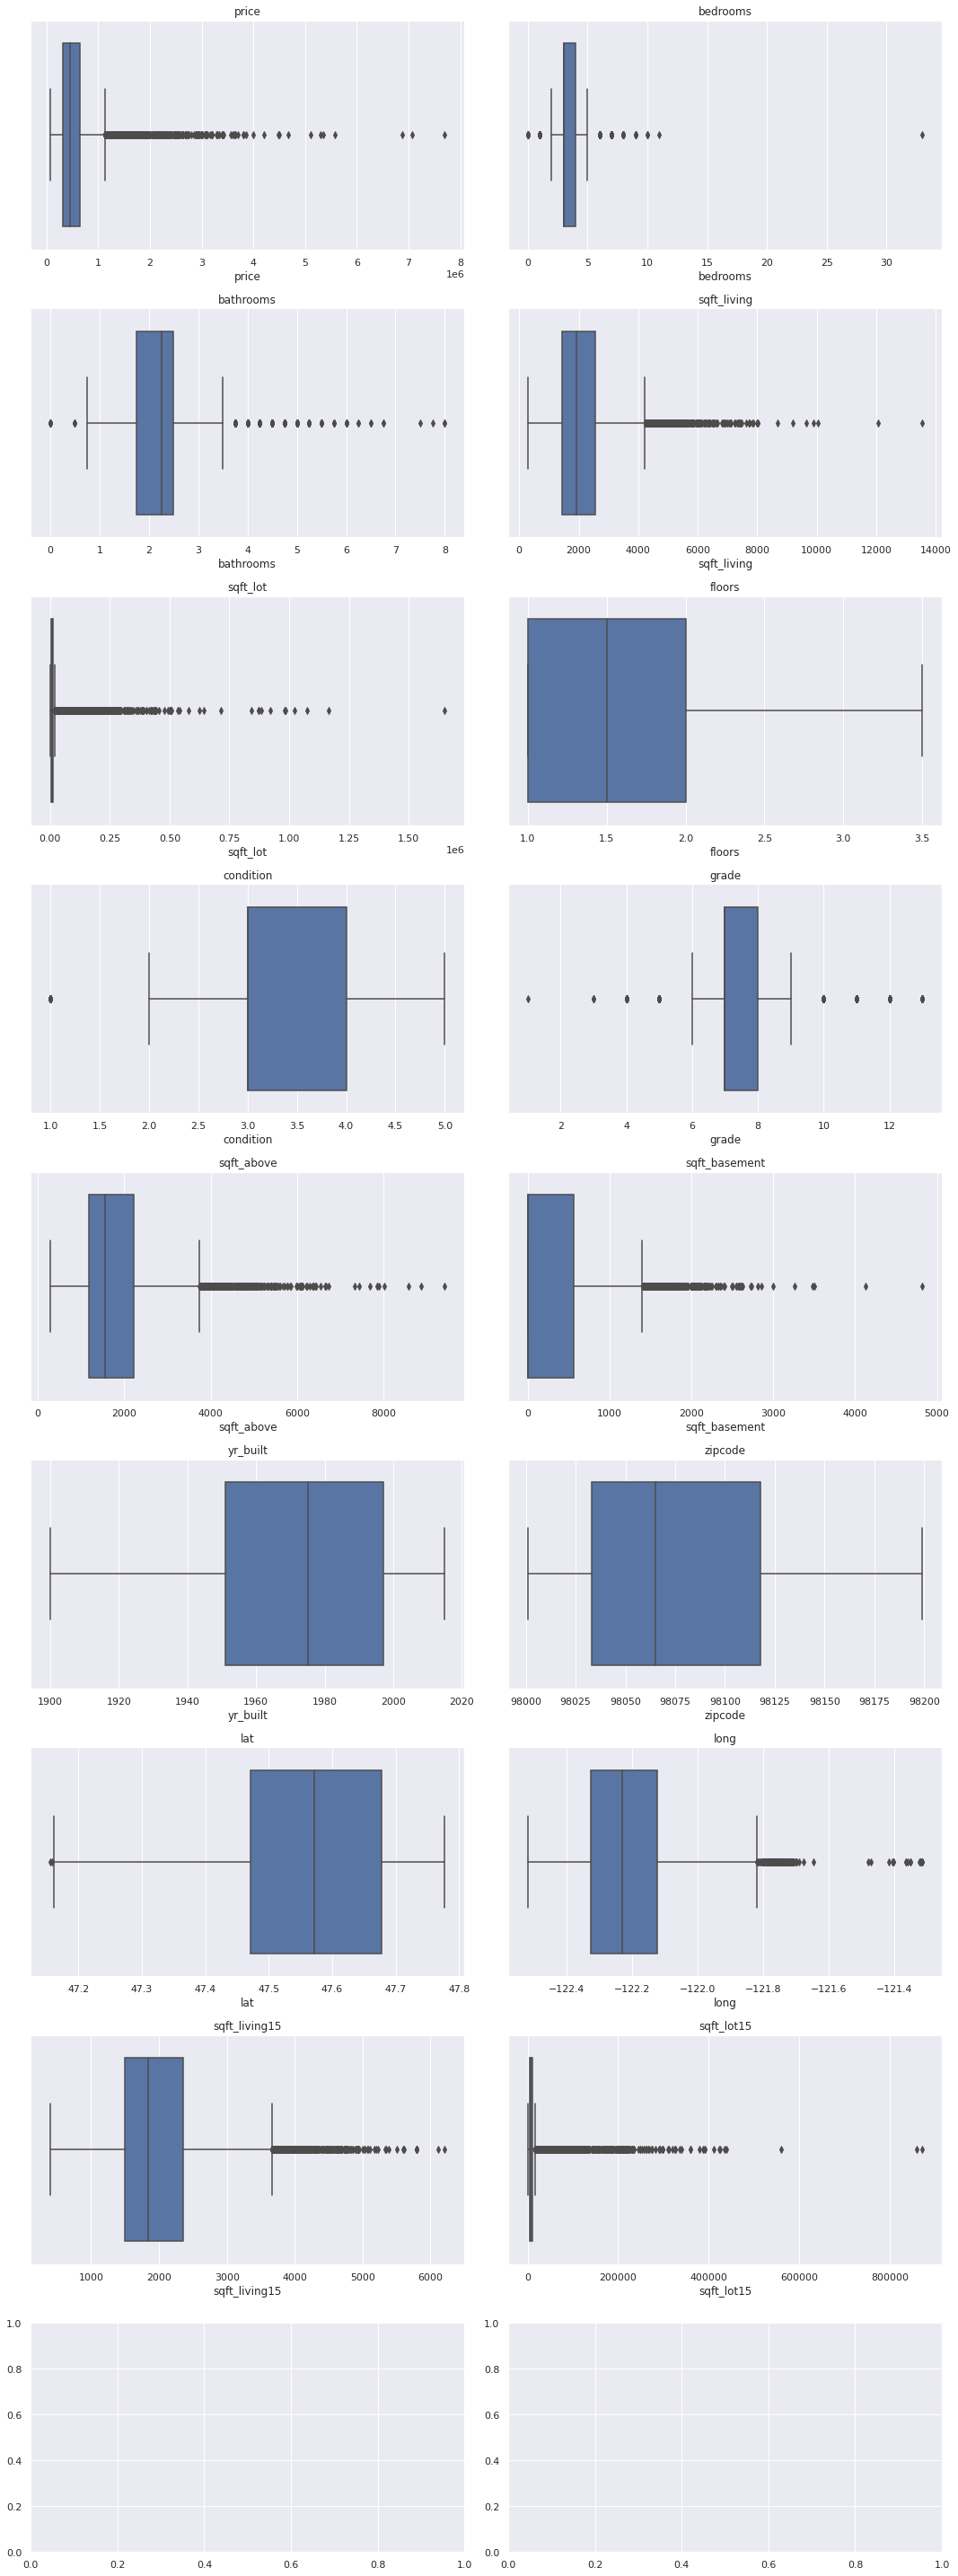

In [15]:
simple_multiplot(data.drop(["id","date"]+categorical,axis=1),2,sns.boxplot)

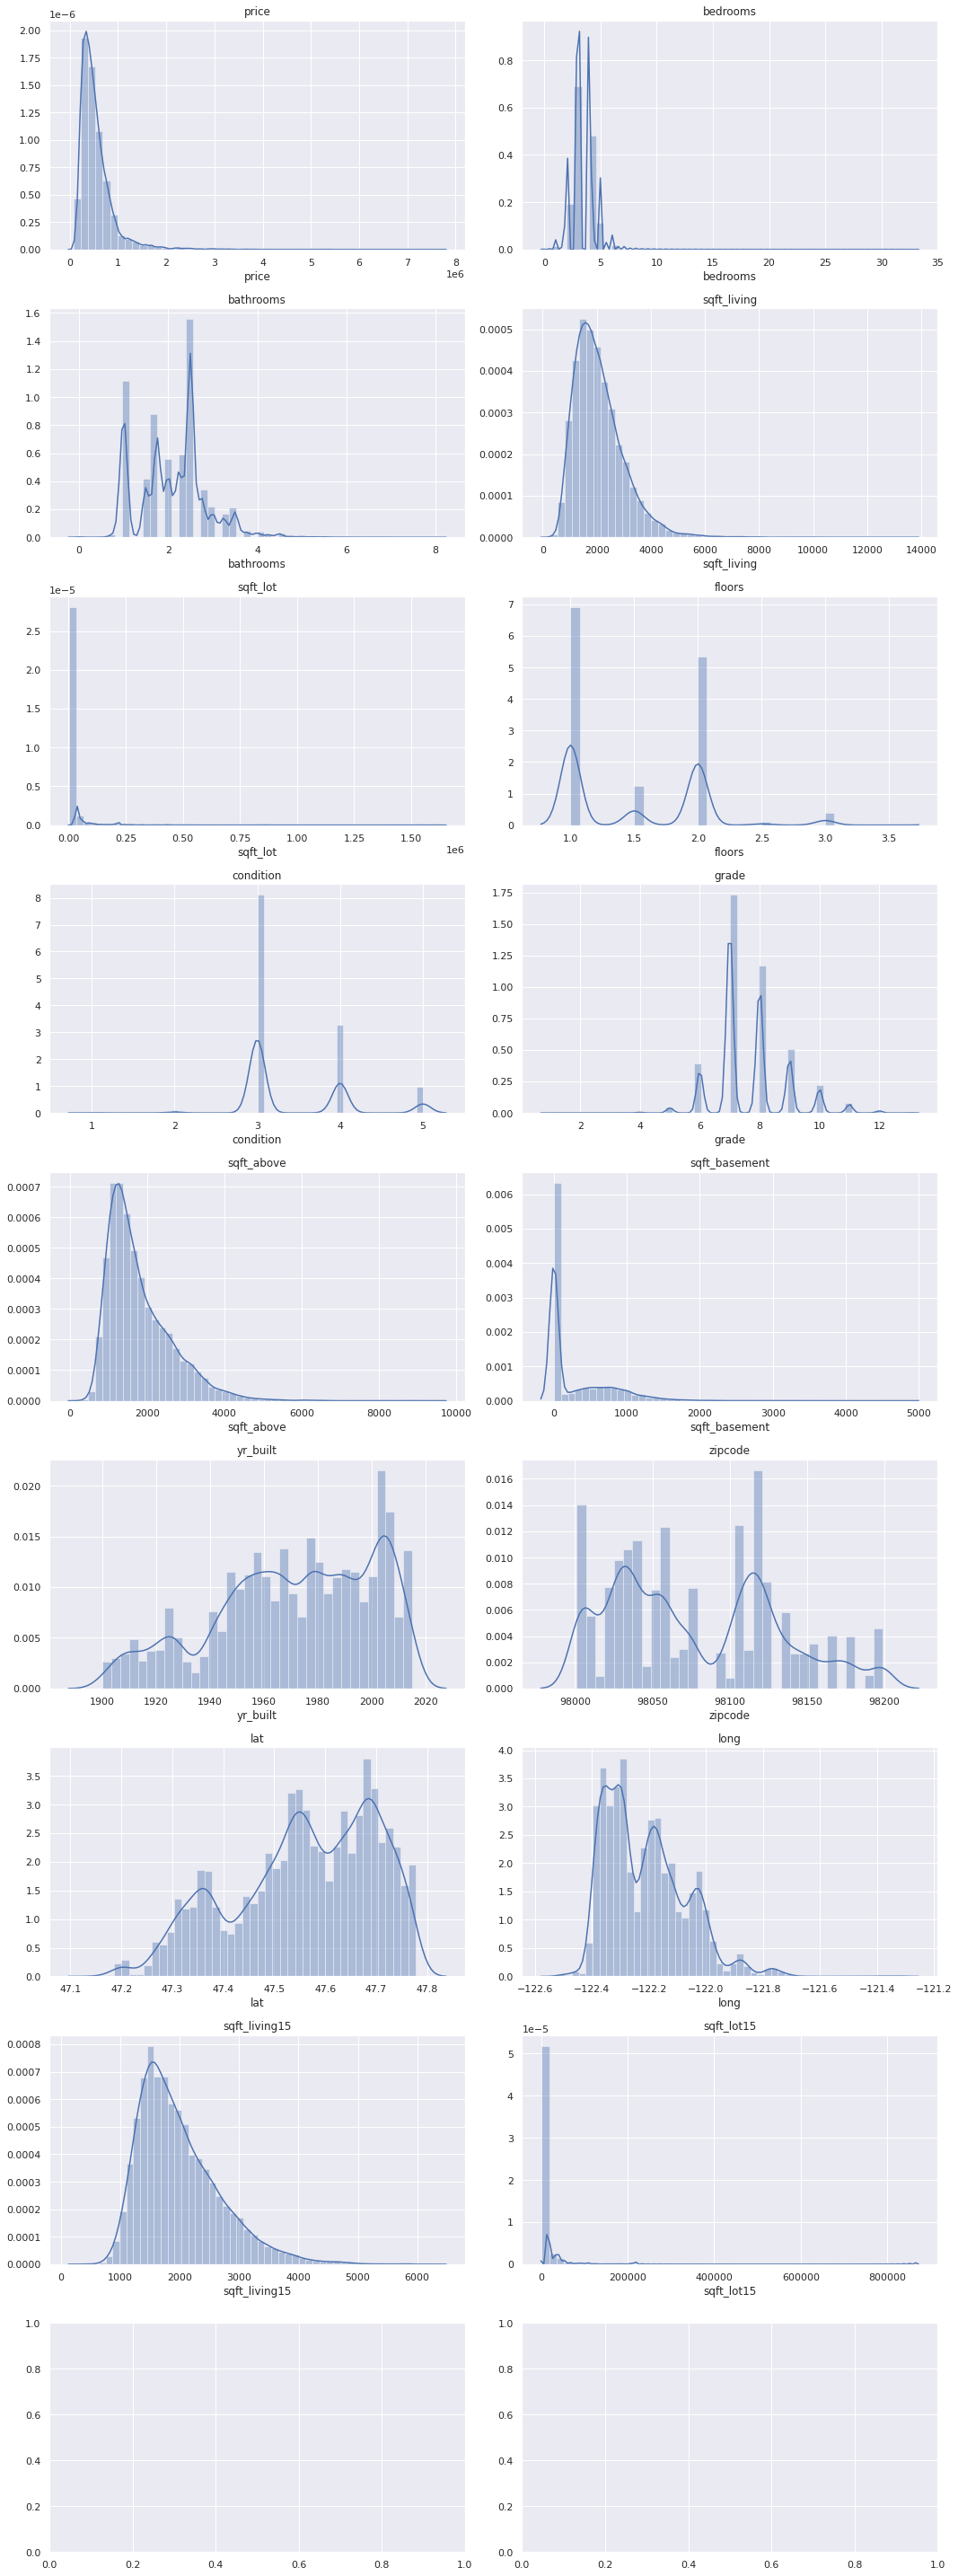

In [16]:
simple_multiplot(data.drop(["id","date"]+categorical,axis=1),2,sns.distplot)

- Because that the predicted column (data[price]) distribution look similar to an exponential distribution we will use a logarithm scale to reduce outliers effects on regression (np.log(data['price']))
- for predictors with outliers we will use winsorize(10%) to aleviate the effect of outliers

In [17]:
# applying log transformation
data['log(price)']=np.log(data['price'])

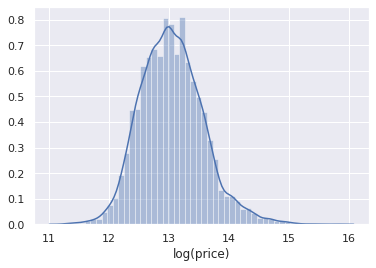

In [18]:
sns.distplot(data['log(price)'])

In [19]:

limit=0.10

data['sqft_lot']=winsorize(data['sqft_lot'],limits=[0,limit])
data['sqft_lot15']=winsorize(data['sqft_lot15'],limits=[0,limit])
data['sqft_living']=winsorize(data['sqft_living'],limits=[0,limit])
data['sqft_above']=winsorize(data['sqft_above'],limits=[0,limit])
data['sqft_basement']=winsorize(data['sqft_basement'],limits=[0,limit])
data['long']=winsorize(data['long'],limits=[0,limit])
data['sqft_living15']=winsorize(data['sqft_living15'],limits=[0,limit])


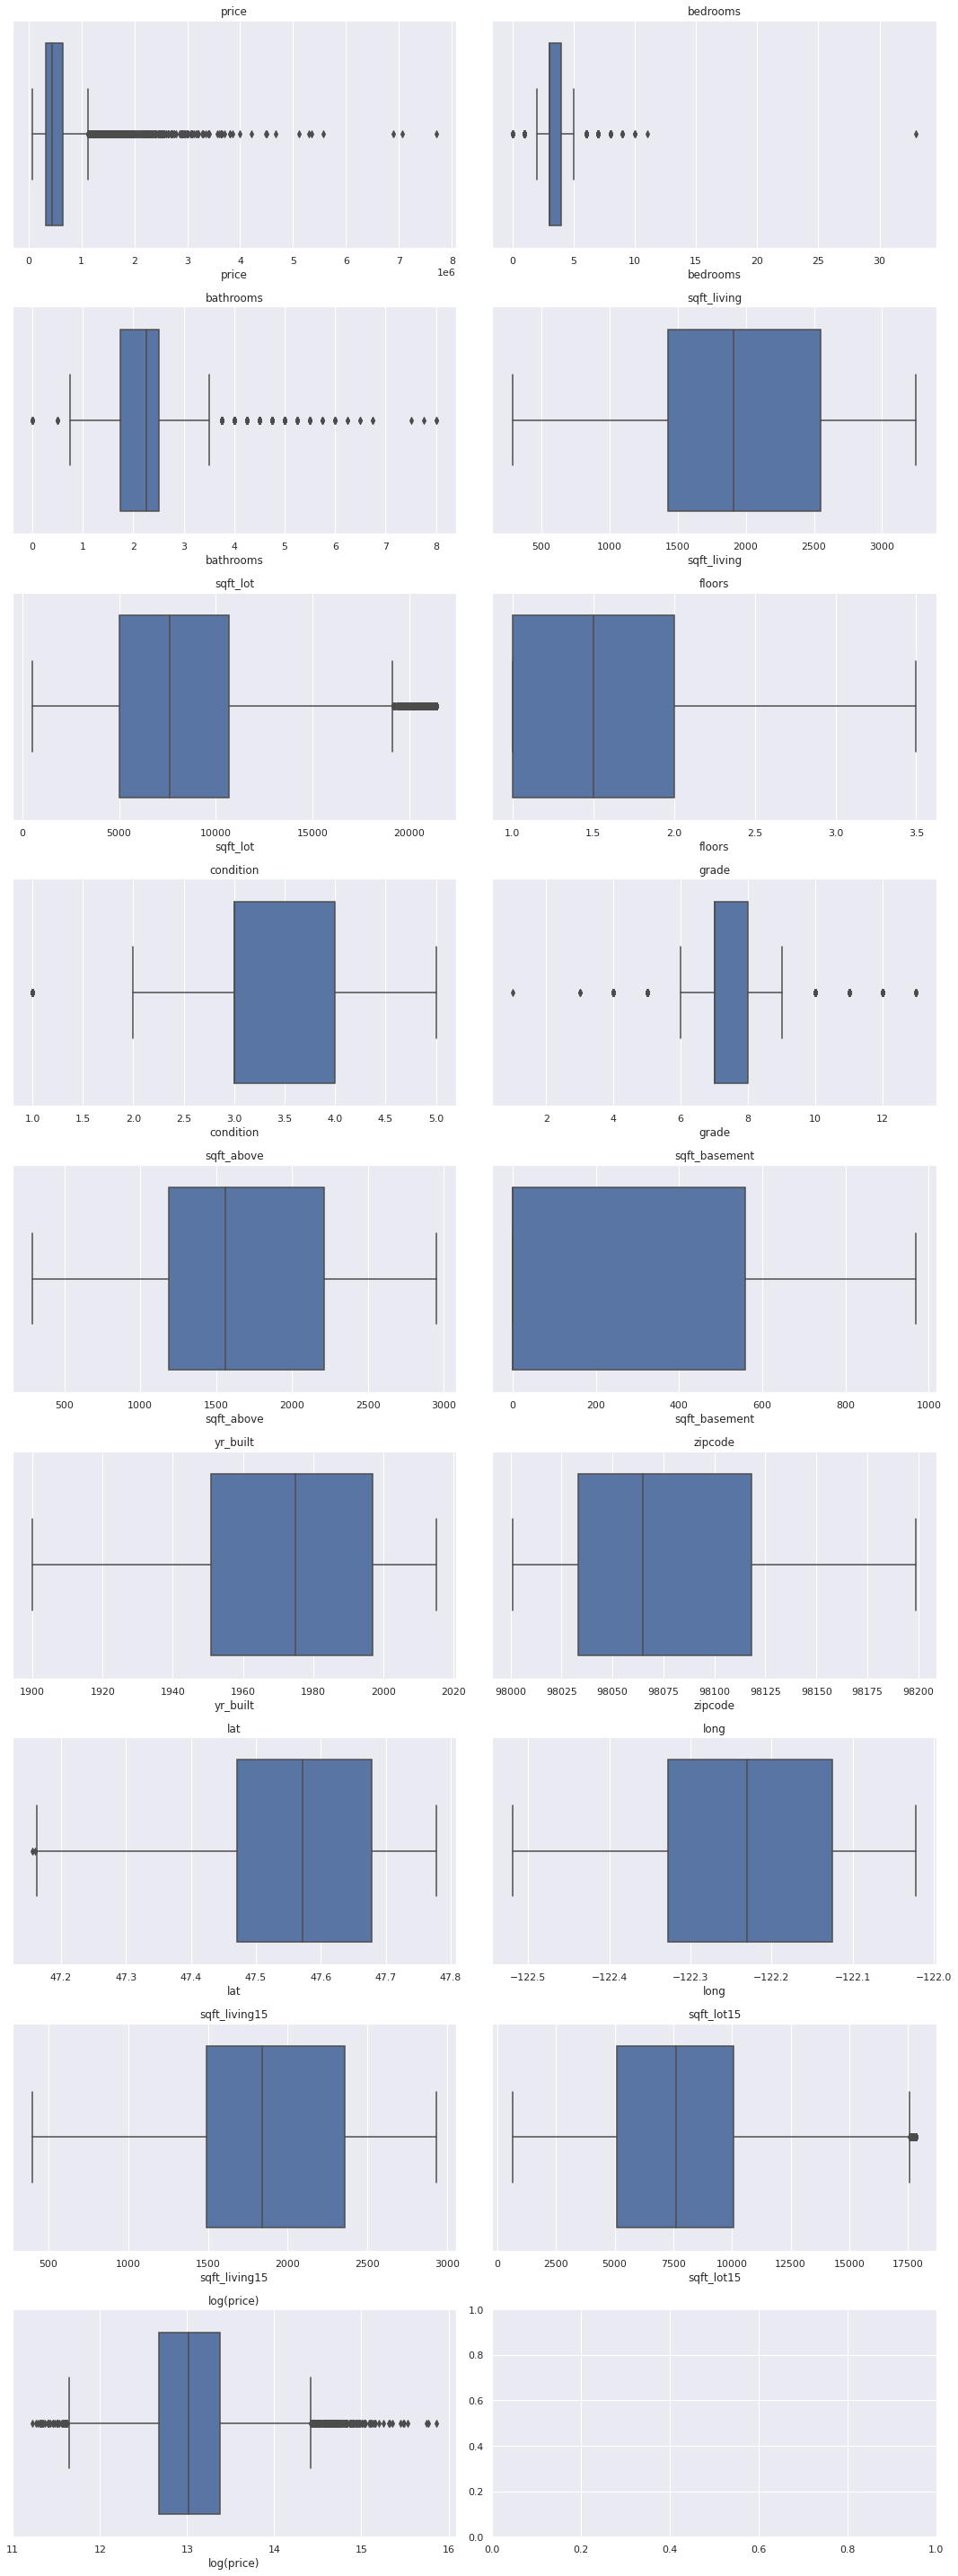

In [20]:
simple_multiplot(data.drop(["id","date"]+categorical,axis=1),2,sns.boxplot)

## Standardize the dataset

In [21]:
scaler = StandardScaler()
data_num=data.drop(["id","date"]+categorical,axis=1)
data[list(data_num.columns)]=scaler.fit_transform(data_num)


In [22]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,log(price)
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,4580301520.86499,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00754,0.23430,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000
std,2876565571.31205,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,0.08652,0.76632,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002
min,1000102.00000,-1.26686,-3.62440,-2.74592,-2.35629,-1.51547,-0.91543,0.00000,0.00000,-3.70267,-5.66334,-2.14650,-0.71243,-2.41738,-1.43803,-2.91679,-2.43090,-2.71239,-1.73411,-3.46055
25%,2123049194.00000,-0.59419,-0.39874,-0.47362,-0.79262,-0.70216,-0.91543,0.00000,0.00000,-0.62919,-0.55884,-0.79961,-0.71243,-0.68108,-0.83994,-0.64270,-0.86606,-0.78618,-0.72915,-0.69429
50%,3904930410.00000,-0.24539,-0.39874,0.17561,-0.12836,-0.23828,0.01054,0.00000,0.00000,-0.62919,-0.55884,-0.24588,-0.71243,0.13601,-0.24185,0.08478,-0.06316,-0.16824,-0.15991,-0.05851
75%,7308900445.00000,0.28577,0.67649,0.50022,0.75181,0.31413,0.93651,0.00000,0.00000,0.90755,0.29192,0.72688,0.81504,0.88500,0.74874,0.85123,0.79710,0.74985,0.39645,0.62504
max,9900000190.00000,19.50299,31.85793,7.64173,1.71449,2.24143,3.71440,1.00000,4.00000,2.44429,4.54567,1.83433,1.93336,1.49781,2.26265,1.57005,1.64096,1.75621,2.15159,5.33332


# Feature selection

## Simple Feature selection

In [23]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

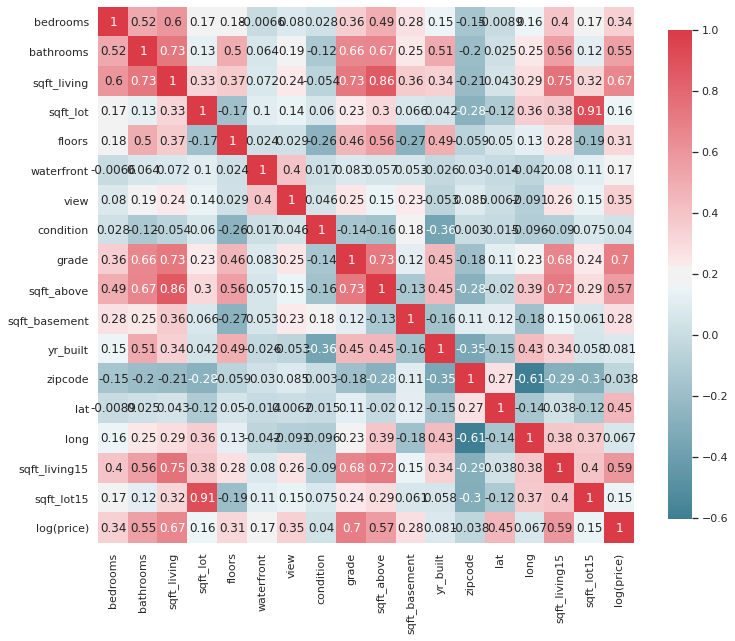

In [24]:
plot_correlation_map(data.drop(["id","date","price"],axis=1))

**Some correlation exist in the data, we must be carefull of collinearity when we do regression**

In [25]:
X= data.drop(["id","date","price","log(price)"],axis=1)
Y=data['log(price)']

select_feature_cov() function select feature according to coorelation factor to the target 

In [26]:
def select_feature_cov(data,target,thredshold):
    corr=data.corr()
    
    feat=list(corr[corr[target]>thredshold].sort_values(by=target,ascending=False).index)
    print("Most importent features realted to target for thredshold > {} (ordred Descending) :{} are {} ".format(thredshold,target,feat[1:]))
    return feat

In [27]:
f=select_feature_cov(data.drop(["id","date","price"],axis=1),'log(price)',0.7)


Most importent features realted to target for thredshold > 0.7 (ordred Descending) :log(price) are ['grade'] 


select_feature_F() calculate relation (F-statistics and pvalues) of features to the target.

In [28]:
def select_feature_F(data,target):
    F,P_F=f_regression(data,target)
    
    cols=pd.DataFrame(np.array(data.columns),columns=['Xi'])
    F=pd.DataFrame(np.array(F),columns=['F Statistic'])
    P_F=pd.DataFrame(np.array(P_F),columns=['P-values {Prob(F Statistic)}'])
   
    df=pd.concat([cols,F,P_F], axis=1)
    
    
    return df.sort_values(by='F Statistic',ascending=False).reset_index(drop=True)

select_feature_F(X,Y)


,Xi,F Statistic,P-values {Prob(F Statistic)}
0,grade,21191.61826,0.00000
1,sqft_living,17224.48002,0.00000
2,sqft_living15,11831.74195,0.00000
3,sqft_above,10511.28956,0.00000
4,bathrooms,9411.77521,0.00000
5,lat,5462.22372,0.00000
6,view,2949.11613,0.00000
7,bedrooms,2892.21936,0.00000
8,floors,2306.78264,0.00000
9,sqft_basement,1822.01741,0.00000


According to the correlation matrix and to the F-statistic test, all existing variable can be predectors of the price. in fact, all F-values values are > 1 and their corresponding p-values are greater than 0.05 which negate the null-hypothesis.
"grade" is the most coorelated feature to log(price) so we will use it for simple linear regression


## Multi-features selection

We will try to use a mixed (stepwize) feature selection in order to reduce the dimentionality of the regression
https://towardsdatascience.com/feature-selection-techniques-in-regression-model-26878fe0e24e

mixed_feature_select() method will do the selection

In [29]:
def mixed_feature_select(X,Y):
    f_selected=[]

    f_available=list(select_feature_F(X,Y)['Xi'])
    
    while len(f_available)>0:   
        lpval=pd.DataFrame(columns=['feature','p-value'])
        for f in f_available:
            model=sm.OLS(Y,X[f_selected+[f]]).fit()
            temp=pd.DataFrame()
            temp['feature']=[f]
            temp['p-value']=[model.f_pvalue]
            lpval=lpval.append(temp)
        fwin=lpval[lpval['p-value']==lpval['p-value'].min()].iloc[0][0]
        pvalwin=lpval[lpval['p-value']==lpval['p-value'].min()].iloc[0][1]
        if pvalwin > 0.05:
            break;
        
            
        f_available.remove(fwin)
        f_selected.append(fwin)
        model=sm.OLS(Y,X[f_selected]).fit()
        for sf in f_selected:
            
            if model.pvalues[sf] > 0.05:
               f_selected.remove(sf) 
    
    res=sm.OLS(Y,X[f_selected]).fit().summary()    
    display(HTML(res.as_html()))
        
    return f_selected

        
features=mixed_feature_select(X,Y)

**Detecting multicollinearity in selected features**

In order to ensure that selected features are non coollinear we will inspect tha variance inflation factor matrix to be sure.

when VIF=1 : no multicollinearity. 1<VIF<5: perfectly ok .  VIF>10 : input Variable must be removed because of collinearity

In [30]:
VIF=pd.DataFrame()
VIF['feature']=features
VIF['VIF']=[variance_inflation_factor(X[features].values, i) for i in range(len(features))]

VIF

,feature,VIF
0,grade,2.95405
1,sqft_living,29.61380
2,sqft_living15,2.87130
3,sqft_above,27.18501
4,bathrooms,3.03252
5,lat,1.17194
6,view,1.39901
7,bedrooms,1.71946
8,sqft_basement,8.33742
9,waterfront,1.21313


In [31]:
def remove_multicolinear_feats(X,feats,threshold):
    f=feats.copy()
    while len(f)>0:
    
        vif=[variance_inflation_factor(X[f].values, i) for i in range(len(f))]
        
        if (max(vif))<=threshold:
            break
            
        maxvifind=vif.index(max(vif))
        f.pop(maxvifind)
    return f

ncol_features=remove_multicolinear_feats(X,features,10)

print("Non collinear features are : {} and its VIF :{}".format(ncol_features,[variance_inflation_factor(X[ncol_features].values, i) for i in range(len(ncol_features))]))


Non collinear features are : ['grade', 'sqft_living15', 'sqft_above', 'bathrooms', 'lat', 'view', 'bedrooms', 'sqft_basement', 'waterfront', 'sqft_lot15', 'yr_built', 'condition', 'zipcode'] and its VIF :[2.9533567417498943, 2.8049205324153457, 4.654093004192151, 3.028596775398053, 1.1715737405528528, 1.3929918318546328, 1.696744375026092, 1.8446623672589926, 1.213103392264251, 1.3359512469891501, 1.951256158915546, 1.2108878384192694, 1.3877629665359579]


A second verification

In [32]:
VIF=pd.DataFrame()
VIF['feature']=ncol_features
VIF['VIF']=[variance_inflation_factor(X[ncol_features].values, i) for i in range(len(ncol_features))]

VIF


,feature,VIF
0,grade,2.95336
1,sqft_living15,2.80492
2,sqft_above,4.65409
3,bathrooms,3.02860
4,lat,1.17157
5,view,1.39299
6,bedrooms,1.69674
7,sqft_basement,1.84466
8,waterfront,1.21310
9,sqft_lot15,1.33595


for Multi-linear regression we will use those non-coolinear features: ['grade', 'sqft_living15', 'sqft_above', 'bathrooms', 'lat', 'view', 'bedrooms', 'sqft_basement', 'waterfront', 'sqft_lot15', 'yr_built', 'condition', 'zipcode']

In [33]:
sm.OLS(Y,X[ncol_features]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             log(price)   R-squared (uncentered):                   0.769
Model:                            OLS   Adj. R-squared (uncentered):              0.768
Method:                 Least Squares   F-statistic:                              5517.
Date:                Sun, 12 Apr 2020   Prob (F-statistic):                        0.00
Time:                        18:24:14   Log-Likelihood:                         -14854.
No. Observations:               21613   AIC:                                  2.973e+04
Df Residuals:                   21600   BIC:                                  2.984e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
grade             0.4022      0.006     71.497      0.000       0.391       0.413
sqft_living15     0.1180      0.005     21.524      0.000       0.107       0.129
sqft_above        0.2483      0.007     35.160      0.000       0.234       0.262
bathrooms         0.1291      0.006     22.667      0.000       0.118       0.140
lat               0.3612      0.004    101.950      0.000       0.354       0.368
view              0.1114      0.005     23.110      0.000       0.102       0.121
bedrooms         -0.0382      0.004     -8.952      0.000      -0.047      -0.030
sqft_basement     0.1203      0.004     27.067      0.000       0.112       0.129
waterfront        0.8427      0.042     20.299      0.000       0.761       0.924
sqft_lot15       -0.0639      0.004    -16.897      0.000      -0.071      -0.057
yr_built         -0.2212      0.005    -48.367      0.000      -0.230      -0.212
condition         0.0695      0.004     19.294      0.000       0.062       0.077
zipcode          -0.0538      0.004    -13.943      0.000      -0.061      -0.046
==============================================================================
Omnibus:                      463.928   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              905.300
Skew:                           0.135   Prob(JB):                    2.61e-197
Kurtosis:                       3.966   Cond. No.                         25.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


The preliminary generated model using statsmodel OLS method is acceptable (F-statistic > 1 and Prob (F-statistic)<0.05) and it's features p-values are significants (P>|t| < 0.05)



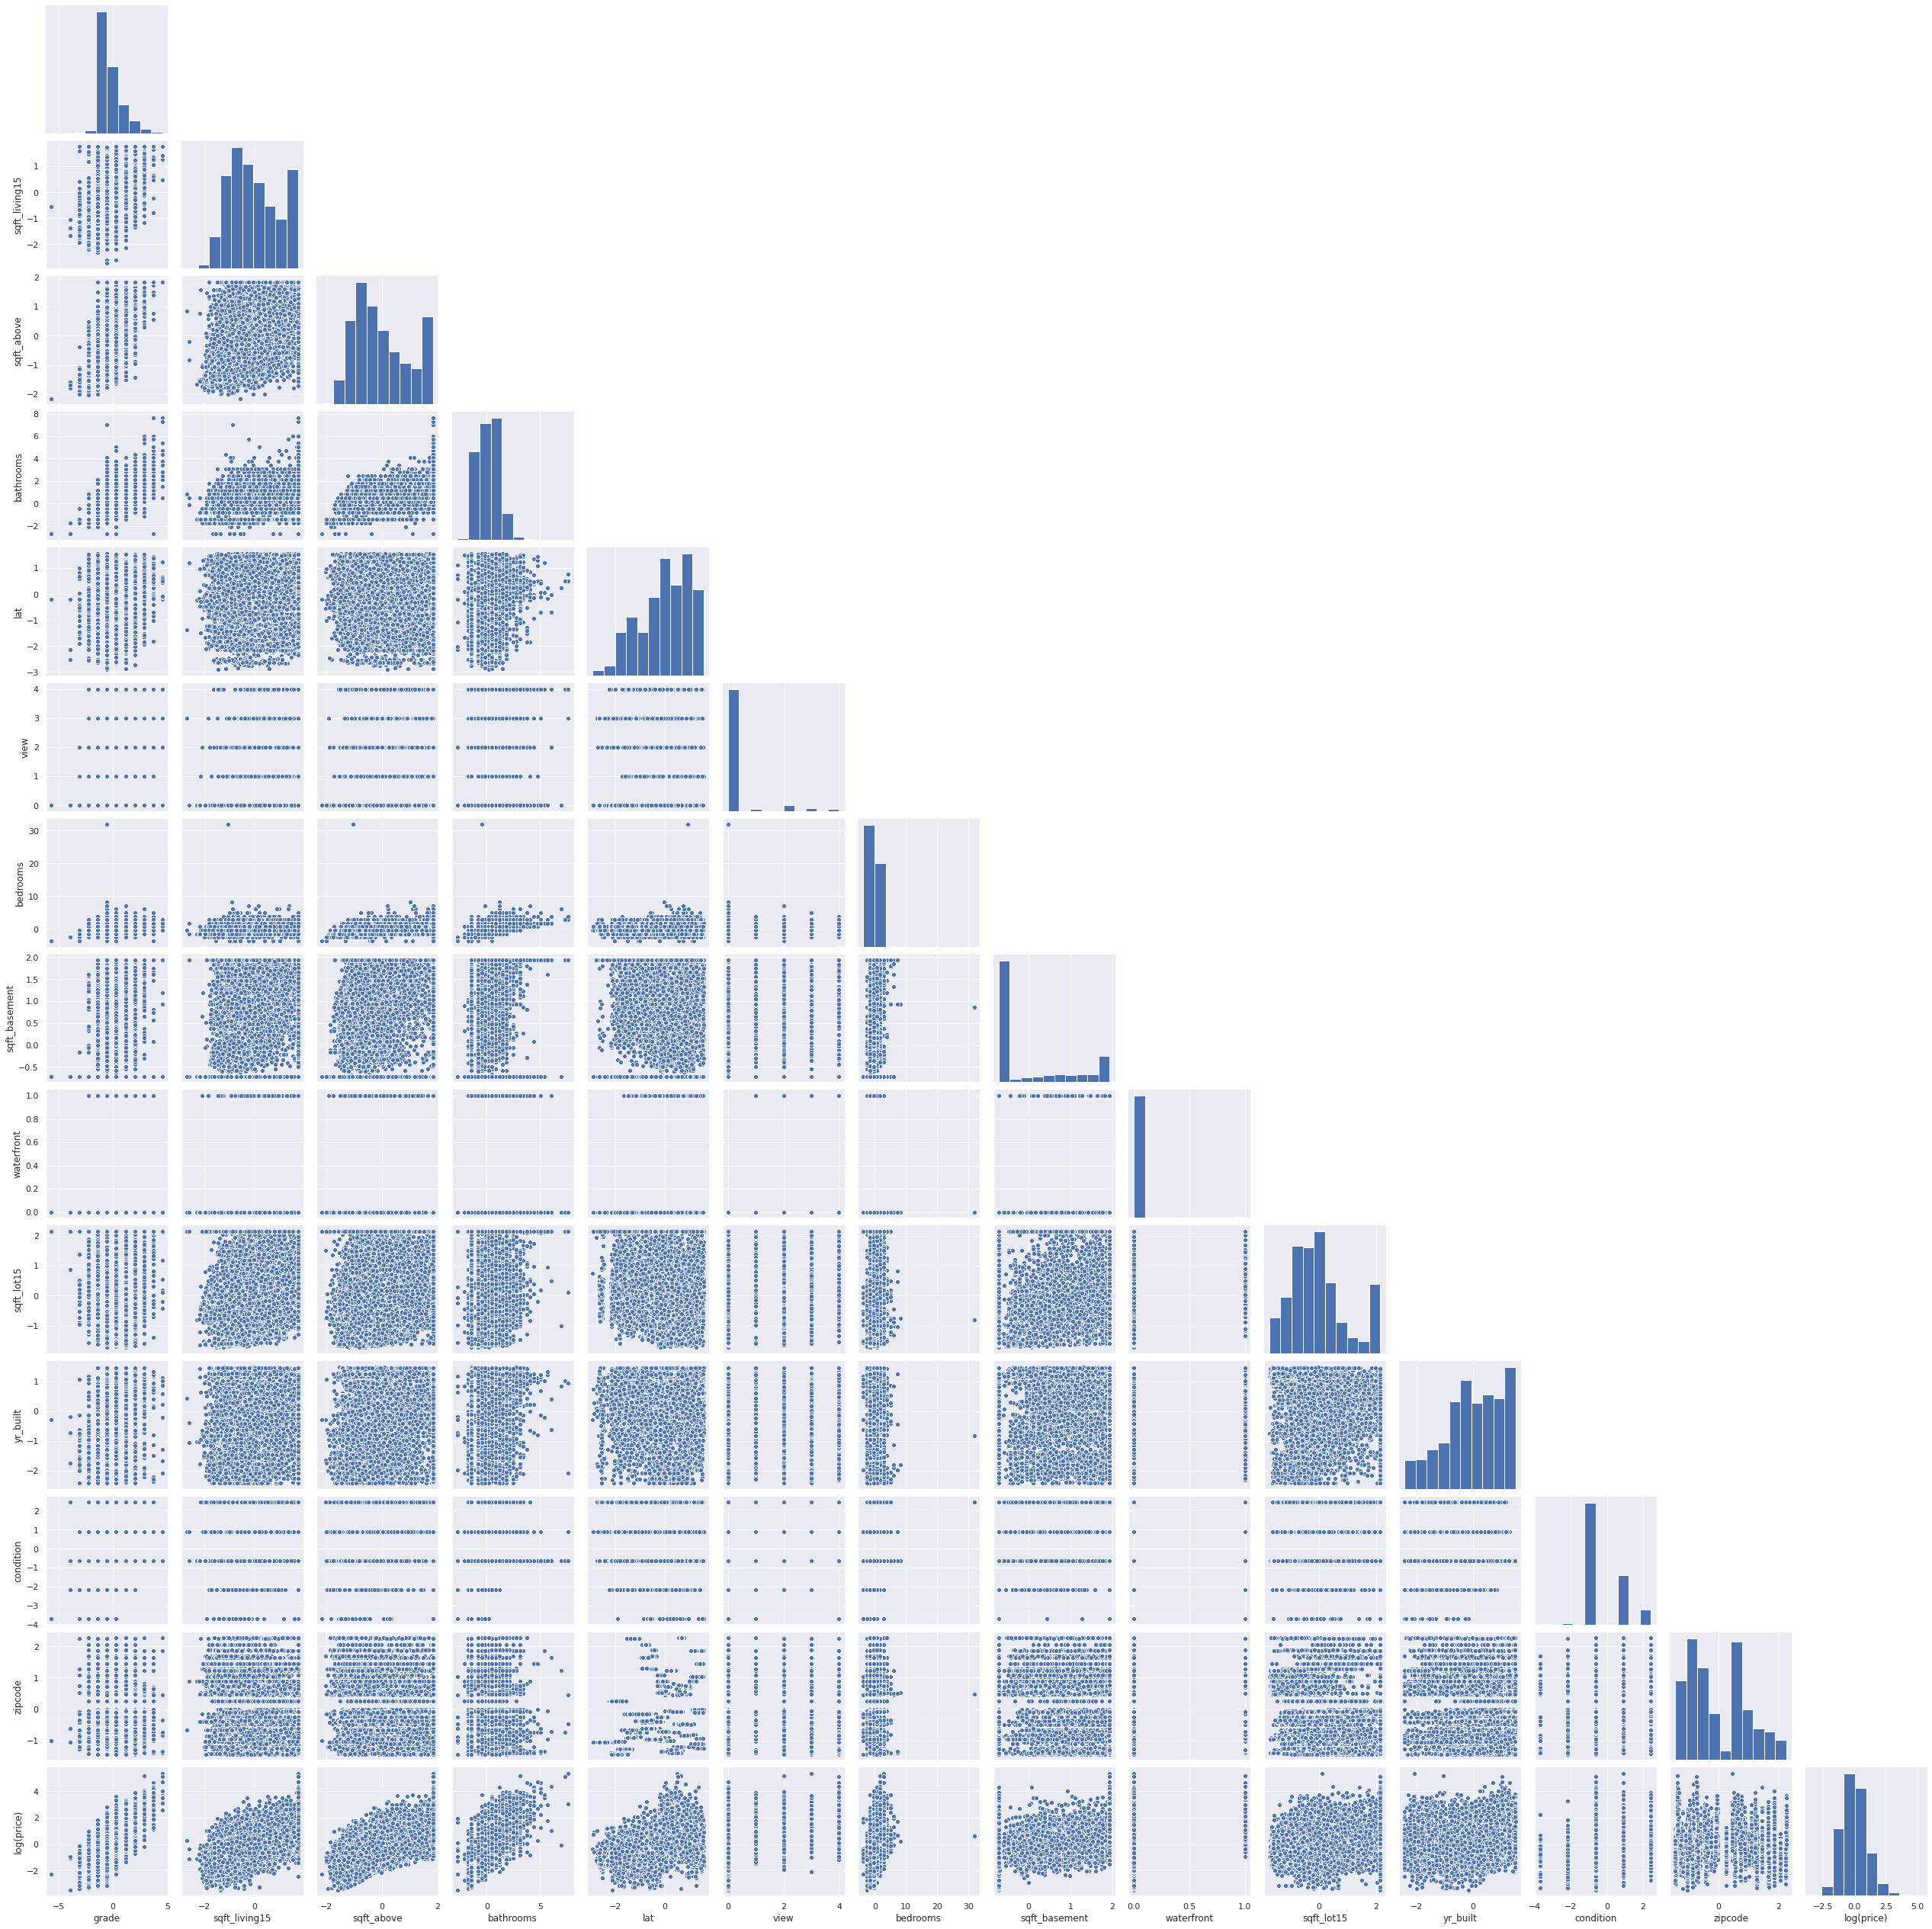

In [34]:
# Pair plot of the most important predictors
all_vars=ncol_features.copy()
all_vars.append('log(price)')
g=sns.pairplot(data[all_vars],corner=True)

# Split your dataset into training and testing datasets.

split_data() function will do the data spliting to training and testing sets

In [35]:
def split_data(X,Y,test_size=0.20,random_state=40):

    cols=list(X.columns)

    Y=Y.values[:,np.newaxis]


    #print("Selected predictors :"," , ".join(cols))
    return train_test_split(X,Y,test_size=test_size,random_state=random_state)

 


# Code extension

We will extend default LinearRegression() method in-order to calculate R2 , R2 adjusted and p-values of selected features

In [36]:

class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """
    
    # nothing changes in __init__
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs

    
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        
        # Calculate SSE (sum of squared errors)
        # and SE (standard error)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])

        # compute the t-statistic for each feature
        self.t = self.coef_ / se
        # find the p-value for each feature
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        
        
        return self
        
    def adj_r2(self,x_train,y_train):
        
        r2 = self.score(x_train,y_train)
        n = x_train.shape[0]
        p = x_train.shape[1]
        adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
        return adjusted_r2
    
    def r2(self,x_train,y_train):
        
        return self.score(x_train,y_train)
    
    def MSE(self,x_train,y_train):
        predicted=self.predict(x_train)
        return metrics.mean_squared_error(y_train,predicted)
    


make_lr() function will do the regression and nicely display it's result

In [37]:
  

def make_lr(X,Y):
    x_train,x_test,y_train,y_test=split_data(X,Y)
    model=LinearRegression()
    model.fit(x_train,y_train)
    
   
    cols=X.columns
    
    
    
       
    results={}
    results["MSE"]=["{:.2f}".format(model.MSE(x_train,y_train))]
    
    results["Predictors"]=[",".join(cols)]

    results["R2"]=[model.r2(x_train,y_train)]
    
    results["R2 adj"]=[model.adj_r2(x_train,y_train)]
   
    
    
    pvals = pd.DataFrame()
    pvals["Features"]=cols
    pvals["p-values"]=model.p
    if (X.shape[1]>1):
        pvals["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        
        
    return model,pd.DataFrame.from_dict(results,orient='index',columns=['Values']),pvals.set_index("Features")

    


# Apply simple Linear regression to your training set

## Linear regression using sklearn library

In [38]:
f=['grade']

In [39]:
x_train,x_test,y_train,y_test= split_data(X[f],Y)
model,results,pvalues=make_lr(X[f],Y)
print("The model is log(price)={} x {} + {}".format(model.coef_[0],f,model.intercept_))
display(HTML(results.to_html()))
display(HTML(pvalues.to_html()))

The model is log(price)=[0.70798856] x ['grade'] + [-0.00243777]


,Values
MSE,0.50
Predictors,grade
R2,0.49741
R2 adj,0.49738


,p-values
Features,
grade,0.00000


**Verification using StatsModels**

In [40]:
results = sm.OLS(y_train,x_train).fit()
res=results.summary()
res

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.497
Model:                            OLS   Adj. R-squared (uncentered):              0.497
Method:                 Least Squares   F-statistic:                          1.711e+04
Date:                Sun, 12 Apr 2020   Prob (F-statistic):                        0.00
Time:                        18:24:48   Log-Likelihood:                         -18615.
No. Observations:               17290   AIC:                                  3.723e+04
Df Residuals:                   17289   BIC:                                  3.724e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
grade          0.7080      0.005    130.808      0.000       0.697       0.719
==============================================================================
Omnibus:                      129.246   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.924
Skew:                           0.199   Prob(JB):                     8.29e-30
Kurtosis:                       3.165   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plot the linear regression

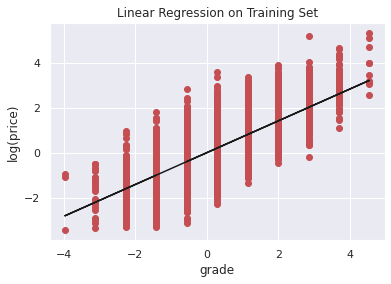

In [41]:
# Train model plotting
plt.scatter(x_train,y_train,color='r')
plt.title('Linear Regression on Training Set')
plt.ylabel('log(price)')
plt.xlabel('grade')
plt.plot(x_train,model.predict(x_train), color='k')
plt.show()

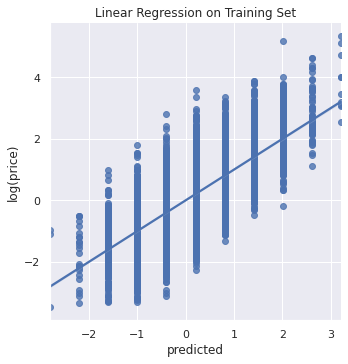

In [42]:
train_result=pd.DataFrame()
train_result['predicted']=model.predict(x_train).flatten()
train_result['log(price)']=y_train.flatten()

train_result['error']=train_result['log(price)']-train_result['predicted']

sns.lmplot(x='predicted',y='log(price)',data=train_result)
plt.title('Linear Regression on Training Set')
plt.show()


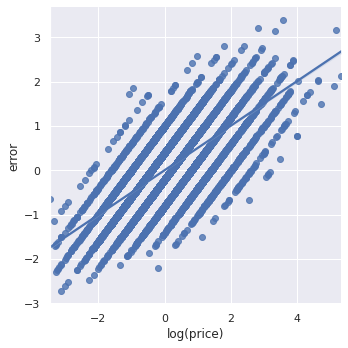

In [43]:
# Trainning error plot
sns.lmplot(x='log(price)',y='error',data=train_result)


Text(0.5, 1.0, 'Residuals Distribution')

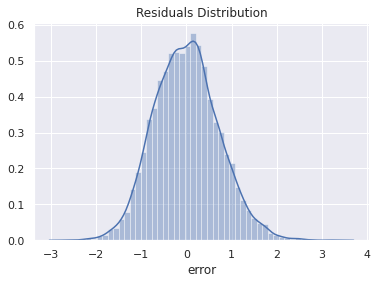

In [44]:
sns.distplot(train_result['error'])
plt.title("Residuals Distribution")

## Measure the performance of linear regression using the testing set

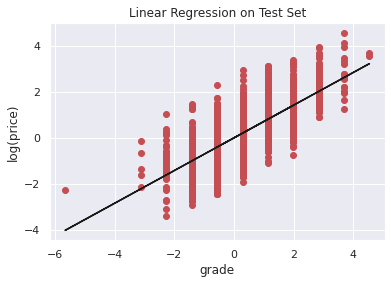

In [45]:
# Test model plotting
plt.scatter(x_test,y_test,color='r')
plt.title('Linear Regression on Test Set')
plt.ylabel('log(price)')
plt.xlabel('grade')
plt.plot(x_test,model.predict(x_test), color='k')
plt.show()

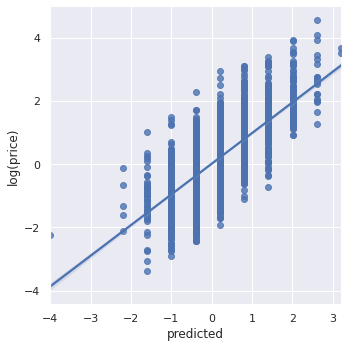

In [46]:
test_result=pd.DataFrame()
test_result['predicted']=model.predict(x_test).flatten()
test_result['log(price)']=y_test.flatten()

test_result['error']=test_result['log(price)']-test_result['predicted']

sns.lmplot(x='predicted',y='log(price)',data=test_result)

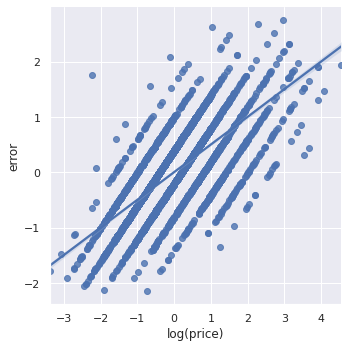

In [47]:
# Testing error plot
sns.lmplot(x='log(price)',y='error',data=test_result)

Text(0.5, 1.0, 'Residuals Distribution')

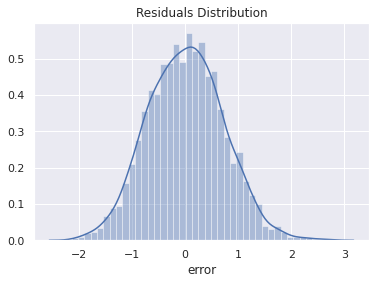

In [48]:
sns.distplot(test_result['error'])
plt.title("Residuals Distribution")

In [49]:
print("MSE Test: ",metrics.mean_squared_error(y_test,model.predict(x_test)))# MSE Test
print("R squared Test: ",metrics.r2_score(y_test,model.predict(x_test)))# R2 Test

MSE Test:  0.507397968164052
R squared Test:  0.48549596934891215


We can see the Mean Square Error Test is similar to the one from Training set and is low (<1) . 

Also the model keep a stable R2 and MSE in the test and in the training => there is no overfitting

But R2 is low => We must add more features to enhance our model


# Apply Multi-Linear regression to your training set

## Linear regression using sklearn library

In [50]:
x_train,x_test,y_train,y_test= split_data(X[ncol_features],Y)
model,results,pvalues=make_lr(X[ncol_features],Y)
print("The model is log(price)={} x {} + {}".format(model.coef_[0],ncol_features,model.intercept_))
display(HTML(results.to_html()))
display(HTML(pvalues.to_html()))

The model is log(price)=[ 0.40477894  0.1205049   0.24019635  0.1308331   0.36217602  0.1294381
 -0.03812863  0.11448952  0.85032326 -0.06690408 -0.21998299  0.06869982
 -0.05470681] x ['grade', 'sqft_living15', 'sqft_above', 'bathrooms', 'lat', 'view', 'bedrooms', 'sqft_basement', 'waterfront', 'sqft_lot15', 'yr_built', 'condition', 'zipcode'] + [-0.03682691]


,Values
MSE,0.23
Predictors,"grade,sqft_living15,sqft_above,bathrooms,lat,view,bedrooms,sqft_basement,waterfront,sqft_lot15,yr_built,condition,zipcode"
R2,0.77166
R2 adj,0.77149


,p-values,VIF
Features,,
grade,0.00000,2.95336
sqft_living15,0.00000,2.80492
sqft_above,0.00000,4.65409
bathrooms,0.00000,3.02860
lat,0.00000,1.17157
view,0.00000,1.39299
bedrooms,0.00000,1.69674
sqft_basement,0.00000,1.84466
waterfront,0.00000,1.21310


**Verification using StatsModels**

In [51]:
results = sm.OLS(y_train,x_train).fit()
res=results.summary()
res

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.770
Model:                            OLS   Adj. R-squared (uncentered):              0.770
Method:                 Least Squares   F-statistic:                              4461.
Date:                Sun, 12 Apr 2020   Prob (F-statistic):                        0.00
Time:                        18:24:53   Log-Likelihood:                         -11841.
No. Observations:               17290   AIC:                                  2.371e+04
Df Residuals:                   17277   BIC:                                  2.381e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
grade             0.4069      0.006     64.698      0.000       0.395       0.419
sqft_living15     0.1228      0.006     20.171      0.000       0.111       0.135
sqft_above        0.2402      0.008     30.557      0.000       0.225       0.256
bathrooms         0.1321      0.006     20.859      0.000       0.120       0.145
lat               0.3612      0.004     91.302      0.000       0.353       0.369
view              0.1128      0.005     21.065      0.000       0.102       0.123
bedrooms         -0.0394      0.005     -8.378      0.000      -0.049      -0.030
sqft_basement     0.1163      0.005     23.539      0.000       0.107       0.126
waterfront        0.8673      0.046     18.732      0.000       0.777       0.958
sqft_lot15       -0.0661      0.004    -15.668      0.000      -0.074      -0.058
yr_built         -0.2222      0.005    -43.441      0.000      -0.232      -0.212
condition         0.0687      0.004     17.037      0.000       0.061       0.077
zipcode          -0.0529      0.004    -12.296      0.000      -0.061      -0.044
==============================================================================
Omnibus:                      351.413   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              661.619
Skew:                           0.137   Prob(JB):                    2.14e-144
Kurtosis:                       3.918   Cond. No.                         25.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plot the linear regression

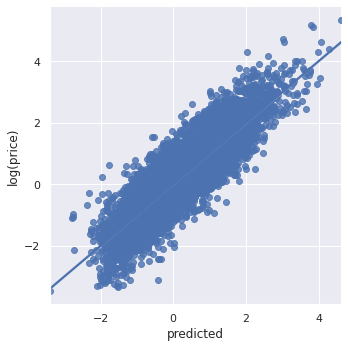

In [52]:
train_result=pd.DataFrame()
train_result['predicted']=model.predict(x_train).flatten()
train_result['log(price)']=y_train.flatten()

train_result['error']=train_result['log(price)']-train_result['predicted']

sns.lmplot(x='predicted',y='log(price)',data=train_result)



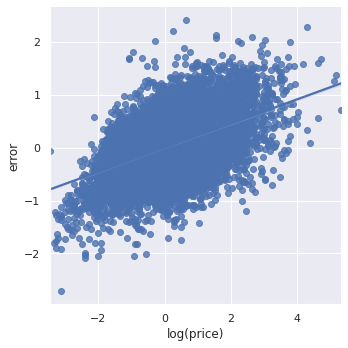

In [53]:
# Trainning error plot
sns.lmplot(x='log(price)',y='error',data=train_result)


Text(0.5, 1.0, 'Residuals Distribution')

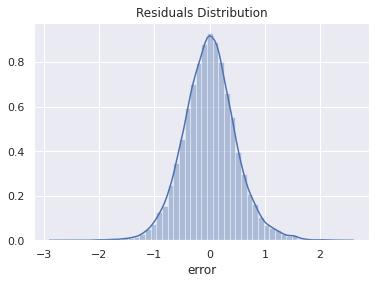

In [54]:
sns.distplot(train_result['error'])
plt.title("Residuals Distribution")

## Measure the performance of linear regression using the testing set

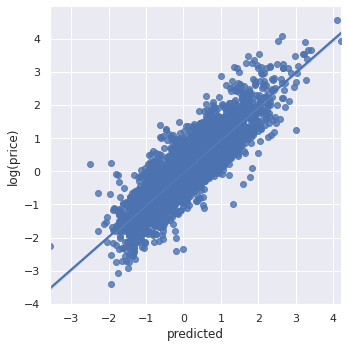

In [55]:
test_result=pd.DataFrame()
test_result['predicted']=model.predict(x_test).flatten()
test_result['log(price)']=y_test.flatten()

test_result['error']=test_result['log(price)']-test_result['predicted']

sns.lmplot(x='predicted',y='log(price)',data=test_result)

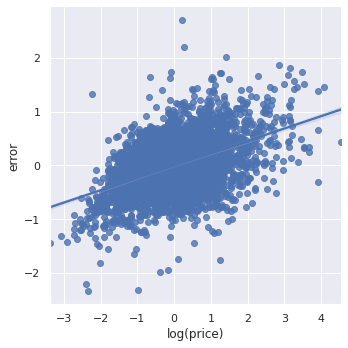

In [56]:
# Testing error plot
sns.lmplot(x='log(price)',y='error',data=test_result)

Text(0.5, 1.0, 'Residuals Distribution')

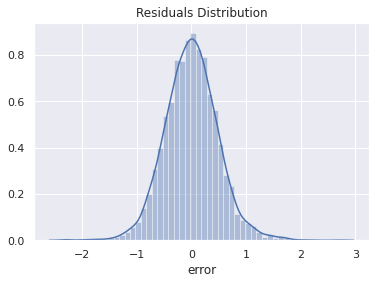

In [57]:
sns.distplot(test_result['error'])
plt.title("Residuals Distribution")

In [58]:
print("MSE Test: ",metrics.mean_squared_error(y_test,model.predict(x_test)))# MSE Test
print("R squared Test: ",metrics.r2_score(y_test,model.predict(x_test)))# R2 Test

MSE Test:  0.2351819805575256
R squared Test:  0.7615243171525072


We can see the Mean Square Error Test is similar to the one from Training set and is low (<1) . 

Also the model keep a stable R2 and MSE in the test and in the training => there is no overfitting

Visually the regression is OK

Multi-linear regression model give better results than simple linear regression. indeed R2 increased and MSE decreased


# Apply Polynomial regression and compare it to the linear and multilinear regression

In [59]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.39874,-1.44746,-1.13231,-0.59240,-0.91543,0,0,-0.62919,-0.55884,-0.81457,-0.71243,-0.54490,1.87015,-0.35257,-0.28436,-1.05101,-0.60491
1,-0.39874,0.17561,0.77931,-0.30594,0.93651,0,0,-0.62919,-0.55884,0.66702,0.37862,-0.68108,0.87957,1.16157,-0.79232,-0.43307,-0.15562
2,-1.47396,-1.44746,-1.69616,0.19033,-0.91543,0,0,-0.62919,-1.40959,-1.42816,-0.71243,-1.29389,-0.93339,1.28354,-0.08773,1.38544,-0.06007
3,0.67649,1.14945,-0.05960,-0.70935,-0.91543,0,0,2.44429,-0.55884,-1.00912,1.76971,-0.20445,1.08516,-0.28329,-1.39860,-1.01570,-0.75173
4,-0.39874,-0.14901,-0.44467,-0.15515,-0.91543,0,0,-0.62919,0.29192,-0.06630,-0.71243,0.54455,-0.07364,0.40955,1.45253,-0.23886,-0.18634


In [60]:
poly= PolynomialFeatures(degree=2)
cols=[str(x) for x in range(171)]
X_ = pd.DataFrame(poly.fit_transform(X),columns=cols)

X_

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170
0,1.00000,-0.39874,-1.44746,-1.13231,-0.59240,-0.91543,0.00000,0.00000,-0.62919,-0.55884,-0.81457,-0.71243,-0.54490,1.87015,-0.35257,-0.28436,-1.05101,-0.60491,0.15899,0.57716,0.45149,0.23621,0.36501,-0.00000,-0.00000,0.25088,0.22283,0.32480,0.28407,0.21727,-0.74570,0.14058,0.11339,0.41908,0.24120,2.09515,1.63897,0.85747,1.32505,-0.00000,-0.00000,0.91073,0.80889,1.17906,1.03121,0.78872,-2.70698,0.51033,0.41161,1.52130,0.87558,1.28212,0.67077,1.03654,-0.00000,-0.00000,0.71243,0.63277,0.92234,0.80669,0.61699,-2.11758,0.39922,0.32199,1.19006,0.68494,0.35093,0.54229,-0.00000,-0.00000,0.37273,0.33105,0.48255,0.42204,0.32279,-1.10787,0.20886,0.16846,0.62261,0.35834,0.83801,-0.00000,-0.00000,0.57597,0.51157,0.74568,0.65218,0.49881,-1.71199,0.32275,0.26031,0.96212,0.55375,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.39588,0.35161,0.51252,0.44825,0.34284,-1.17667,0.22183,0.17892,0.66128,0.38060,0.31230,0.45521,0.39813,0.30451,-1.04511,0.19703,0.15891,0.58734,0.33804,0.66353,0.58032,0.44386,-1.52337,0.28719,0.23163,0.85612,0.49274,0.50755,0.38820,-1.33235,0.25118,0.20259,0.74877,0.43095,0.29691,-1.01904,0.19212,0.15495,0.57269,0.32961,3.49747,-0.65936,-0.53180,-1.96554,-1.13127,0.12431,0.10026,0.37056,0.21327,0.08086,0.29887,0.17201,1.10462,0.63576,0.36591
1,1.00000,-0.39874,0.17561,0.77931,-0.30594,0.93651,0.00000,0.00000,-0.62919,-0.55884,0.66702,0.37862,-0.68108,0.87957,1.16157,-0.79232,-0.43307,-0.15562,0.15899,-0.07002,-0.31074,0.12199,-0.37342,-0.00000,-0.00000,0.25088,0.22283,-0.26596,-0.15097,0.27157,-0.35072,-0.46316,0.31593,0.17268,0.06205,0.03084,0.13685,-0.05372,0.16446,0.00000,0.00000,-0.11049,-0.09814,0.11713,0.06649,-0.11960,0.15446,0.20398,-0.13914,-0.07605,-0.02733,0.60733,-0.23842,0.72983,0.00000,0.00000,-0.49033,-0.43551,0.51981,0.29506,-0.53077,0.68546,0.90523,-0.61747,-0.33750,-0.12128,0.09360,-0.28651,-0.00000,-0.00000,0.19249,0.17097,-0.20406,-0.11583,0.20837,-0.26909,-0.35537,0.24240,0.13249,0.04761,0.87704,0.00000,0.00000,-0.58924,-0.52335,0.62466,0.35458,-0.63783,0.82372,1.08782,-0.74201,-0.40557,-0.14574,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.39588,0.35161,-0.41968,-0.23822,0.42853,-0.55341,-0.73084,0.49852,0.27248,0.09791,0.31230,-0.37275,-0.21159,0.38061,-0.49153,-0.64913,0.44278,0.24201,0.08697,0.44491,0.25255,-0.45429,0.58668,0.77478,-0.52849,-0.28886,-0.10380,0.14335,-0.25787,0.33302,0.43979,-0.29999,-0.16397,-0.05892,0.46387,-0.59905,-0.79112,0.53963,0.29495,0.10599,0.77364,1.02168,-0.69690,-0.38091,-0.13688,1.34924,-0.92034,-0.50304,-0.18076,0.62777,0.34313,0.12330,0.18755,0.06739,0.02422
2,1.00000,-1.47396,-1.44746,-1.69616,0.19033,-0.91543,0.00000,0.00000,-0.62919,-1.40959,-1.42816,-0.71243,-1.29389,-0.93339,1.28354,-0.08773,1.38544,-0.06007,2.17256,2.13350,2.50008,-0.28054,1.34930,-0.00000,-0.00000,0.92740,2.07767,2.10505,1.05009,1.90714,1.37578,-1.89188,0.12932,-2.04209,0.08854,2.09515,2.45514,-0.27549,1.32505,-0.00000,-0.00000,0.91073,2.04033,2.06721,1.03121,1.87286,1.35105,-1.85787,0.12699,-2.00538,0.08695,2.87697,-0.32283,1.55272,-0.00000,-0.00000,1.06720,2.39089,2.42239,1.20839,2.19465,1.58318,-2.17709,0.14881,-2.34994,

We will repeate the same above steps

- select non colinear most significant features
- split training and testing data
- make the linear regression
- Measure the performance of linear regression using the testing set

## select non colinear most significant features

In [61]:
features=mixed_feature_select(X_,Y)
ncol_features=remove_multicolinear_feats(X_,features,10)
ncol_features

/home/hichem/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/home/hichem/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/home/hichem/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/hichem/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/hichem/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


/home/hichem/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


['9',
 '3',
 '16',
 '14',
 '161',
 '7',
 '126',
 '71',
 '11',
 '109',
 '169',
 '37',
 '141',
 '35',
 '170',
 '155',
 '93',
 '160',
 '17',
 '150',
 '153',
 '82',
 '26',
 '156',
 '132',
 '20',
 '12',
 '53',
 '15',
 '165',
 '59',
 '151',
 '89',
 '125',
 '164',
 '76',
 '8',
 '13',
 '70',
 '139',
 '152',
 '136',
 '116',
 '154',
 '162',
 '163',
 '131',
 '102',
 '30',
 '73',
 '90']

In [62]:
print("{} selected features from a total of {} features".format(len(ncol_features), X_.shape[1]))

51 selected features from a total of 171 features


In [63]:
VIF=pd.DataFrame()
VIF['feature']=ncol_features
VIF['VIF']=[variance_inflation_factor(X_[ncol_features].values, i) for i in range(len(ncol_features))]

VIF

,feature,VIF
0,9,3.82733
1,3,4.51209
2,16,3.34514
3,14,1.68223
4,161,2.62382
5,7,2.14980
6,126,3.45242
7,71,3.36271
8,11,2.79033
9,109,1.99500


All 51 features are non collinear (VIF < 10)

## split training and testing data

In [64]:
x_train,x_test,y_train,y_test= split_data(X_[ncol_features],Y) 

## make the linear regression

In [65]:
model,results,pvalues=make_lr(X_[ncol_features],Y)
print("The model is log(price)={} X + {}".format(model.coef_[0],model.intercept_))
display(HTML(results.to_html()))
display(HTML(pvalues.to_html()))

The model is log(price)=[ 0.32007973  0.33721127  0.14471164  0.34866815 -0.16266929  0.11153143
  0.01139053 -0.01366688  0.02443207 -0.01106476  0.02655067  0.02537427
 -0.03621818  0.02193598  0.01801004  0.03309801  1.06111946 -0.0256818
 -0.04633717  0.05496228  0.04038113 -0.02783295  0.0323721   0.02146934
 -0.04584417 -0.03650492 -0.06182779  0.02247809 -0.11461602  0.06132955
 -0.09647289  0.04260171 -0.0341566   0.03552272 -0.06256883 -0.01916695
  0.08136885 -0.15158827 -0.02261153  0.01451128 -0.06762998  0.10776327
 -0.00522969 -0.04987202 -0.06952567  0.02298475  0.05116399  0.25766684
 -0.02025253 -0.0202638  -0.01506825] X + [-0.0051541]


,Values
MSE,0.18
Predictors,"9,3,16,14,161,7,126,71,11,109,169,37,141,35,170,155,93,160,17,150,153,82,26,156,132,20,12,53,15,165,59,151,89,125,164,76,8,13,70,139,152,136,116,154,162,163,131,102,30,73,90"
R2,0.82463
R2 adj,0.82411


,p-values,VIF
Features,,
9,0.00000,3.82733
3,0.00000,4.51209
16,0.00000,3.34514
14,0.00000,1.68223
161,0.00000,2.62382
7,0.00000,2.14980
126,0.00010,3.45242
71,0.00408,3.36271
11,0.00000,2.79033


We got a better results with R2 increased to 0.82 and MSE decreased to 0.18

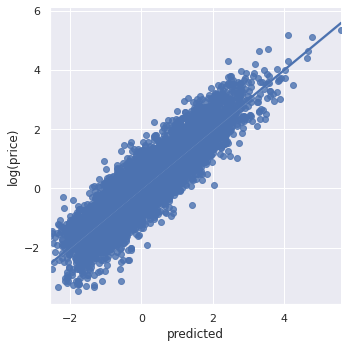

In [66]:
train_result=pd.DataFrame()
train_result['predicted']=model.predict(x_train).flatten()
train_result['log(price)']=y_train.flatten()

train_result['error']=train_result['log(price)']-train_result['predicted']

sns.lmplot(x='predicted',y='log(price)',data=train_result)

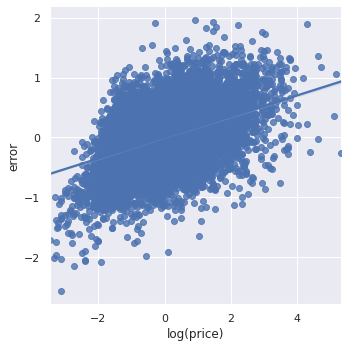

In [67]:
# Trainning error plot
sns.lmplot(x='log(price)',y='error',data=train_result)

## Measure the performance of linear regression using the testing set

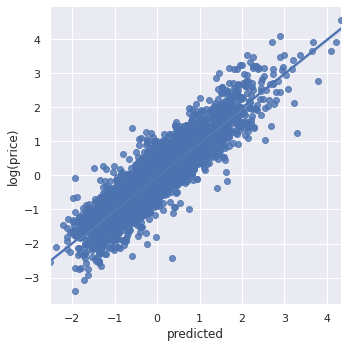

In [68]:
test_result=pd.DataFrame()
test_result['predicted']=model.predict(x_test).flatten()
test_result['log(price)']=y_test.flatten()

test_result['error']=test_result['log(price)']-test_result['predicted']

sns.lmplot(x='predicted',y='log(price)',data=test_result)

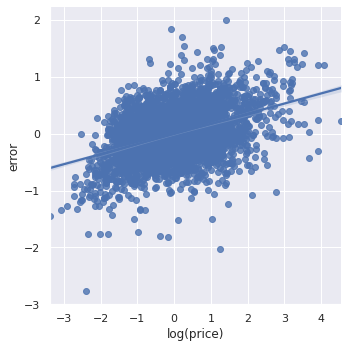

In [69]:
# Testing error plot
sns.lmplot(x='log(price)',y='error',data=test_result)

Text(0.5, 1.0, 'Residuals Distribution')

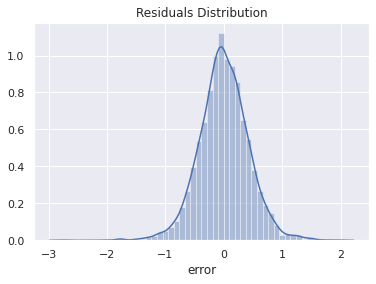

In [70]:
sns.distplot(test_result['error'])
plt.title("Residuals Distribution")

In [71]:
print("MSE Test: ",metrics.mean_squared_error(y_test,model.predict(x_test)))# MSE Test
print("R squared Test: ",metrics.r2_score(y_test,model.predict(x_test)))# R2 Test

MSE Test:  0.1791727105283099
R squared Test:  0.8183179919244558


We've got also a better result on the testing set for R2 and MSE

The model also is stable between trainning and testing => there is no overfitting
Visually the regression is OK

Polynomial feature transformation gave a better model than multi-linear regression (R2 increased and MSE decreased)